# Microdosimetric analysis of Geant4 CNPTEPC neutron/proton simulation data
## Andrei R. Hanu - andrei.hanu@nasa.gov

In [1]:
# Matplotlib - 2D plotting library
from matplotlib import pyplot as plt
from matplotlib import rcParams

# Show matplotlib figures inline the notebook
%matplotlib inline

# Pandas - High-performance data analysis
import pandas

# Glob - Unix style pathname pattern expansion
# Used to aggregate folders and files into a single list so they can be iterated over
import glob

# Numpy - For handling of large, multi-dimensional arrays and matrices
import numpy as np

# Color palette library for Python
# How to choose a colour scheme for your data:
# http://earthobservatory.nasa.gov/blogs/elegantfigures/2013/08/05/subtleties-of-color-part-1-of-6/
import brewer2mpl

In [12]:
##########################################################################################
# Setting rcParams for publication quality graphs
fig_width_pt = 246.0                    # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # Width in inches
fig_height = fig_width*golden_mean      # Height in inches
fig_size =  [fig_width, fig_height]
# fig_size =  [7.3,4.2]
fig_size =  [7.3*1.25,4.2*1.25]
# fig_size =  [7.3*1.5,4.2*1.5]
# fig_size =  [7.3*2,4.2*2]
params = {'backend': 'pdf',
        'axes.labelsize': 10,
        'legend.fontsize': 10,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        'xtick.major.size': 7,
        'xtick.major.width': 1,
        'xtick.minor.size': 3.5,
        'xtick.minor.width': 1.25,
        'ytick.major.size': 7,
        'ytick.major.width': 1.25,
        'ytick.minor.size': 3.5,
        'ytick.minor.width': 1.25,
        'font.family': 'sans-serif',
        'font.sans-serif': 'Avant Garde',
        'font.size': 10,
        'text.usetex': True,
        'figure.figsize': fig_size}

# Update rcParams
rcParams.update(params)

In [3]:
##########################################################################################
# Energy of incident particles (Protons) in keV
InputEnergies_Proton = np.array([np.linspace(9000000,9000000, num=1, endpoint=True, dtype = int)
                ]).flatten()

##########################################################################################
# Energy of incident particles (Neutrons)
InputEnergies_Neutron = np.array([np.linspace(1000,9000, num=9, endpoint=True, dtype = int)
                ]).flatten()

# Folder containing simulation data
DataFolder_Proton = '../Results/ACD_4p0mm/Protons/'
DataFolder_Neutron = '../Results/ACD_4p0mm/Neutrons/'
# DataFolder_Neutron = '../Results/ACD_4p0mm/Neutrons_Forced/'

##########################################################################################
# Energy thresholds (in eV) for events that will be included in the analysis
Thr_TEPC = 325.
Thr_ACD = 325.

In [4]:
#########################################################################################
# Load the simulation data for protons
DataFrame = []

for InputEnergy in InputEnergies_Proton[InputEnergies_Proton.argsort()]:
    # Create data file template from current energy 
    DataFilename = 'proton_' + str(InputEnergy) + 'keV_Nr_100000000_ISO_nt_G4CNPTEPC_t*.csv'
    
    # Print energy 
    print '\n------------------------------------------------------------'
    print 'Proton Energy: \t\t', str(InputEnergy), ' keV'
    print '------------------------------------------------------------'

    ##########################################################################################
    # Process the simulation data files
    # Column 0 - Energy deposited in the TEPC sensitive volume [eV]
    # Column 1 - Track length of particles that entirely traverse the TEPC [mm]
    # Column 2 - Energy deposited in the plastic scintillator [eV]
    for dataFile in glob.glob(DataFolder_Proton + DataFilename):  
        print 'Importing: ' + dataFile
        df = pandas.read_csv(dataFile, header=-1, skiprows=6, usecols=[0,1,2])
        DataFrame.append(df) 
    
    # Merge the DataFrames from each file
    Data = pandas.concat(DataFrame).values

# Print the number of total events
print '\nTotal number of events: \t\t', Data[:,0].size
print 'Number of coincidence events: \t\t', Data[np.logical_and((Data[:,2] > Thr_ACD),(Data[:,0] > Thr_TEPC)),0].size
print 'Number of anti-coincidence events: \t', Data[np.logical_and((Data[:,2] <= Thr_ACD),(Data[:,0] > Thr_TEPC)),0].size
print 'Number of sub-threshold events: \t', Data[np.logical_and((Data[:,2] <= Thr_ACD),(Data[:,0] <= Thr_TEPC)),0].size


------------------------------------------------------------
Proton Energy: 		9000000  keV
------------------------------------------------------------
Importing: ../Results/ACD_4p0mm/Protons/proton_9000000keV_Nr_100000000_ISO_nt_G4CNPTEPC_t0.csv
Importing: ../Results/ACD_4p0mm/Protons/proton_9000000keV_Nr_100000000_ISO_nt_G4CNPTEPC_t1.csv
Importing: ../Results/ACD_4p0mm/Protons/proton_9000000keV_Nr_100000000_ISO_nt_G4CNPTEPC_t2.csv
Importing: ../Results/ACD_4p0mm/Protons/proton_9000000keV_Nr_100000000_ISO_nt_G4CNPTEPC_t3.csv
Importing: ../Results/ACD_4p0mm/Protons/proton_9000000keV_Nr_100000000_ISO_nt_G4CNPTEPC_t4.csv
Importing: ../Results/ACD_4p0mm/Protons/proton_9000000keV_Nr_100000000_ISO_nt_G4CNPTEPC_t5.csv
Importing: ../Results/ACD_4p0mm/Protons/proton_9000000keV_Nr_100000000_ISO_nt_G4CNPTEPC_t6.csv
Importing: ../Results/ACD_4p0mm/Protons/proton_9000000keV_Nr_100000000_ISO_nt_G4CNPTEPC_t7.csv

Total number of events: 		6736752
Number of coincidence events: 		1421114
Number of an

In [5]:
##########################################################################################
# Load the simulation data for neutrons
# DataFrame = []

for InputEnergy in InputEnergies_Neutron[InputEnergies_Neutron.argsort()]:
    # Create data file template from current energy 
    DataFilename = 'neutron_' + str(InputEnergy) + 'keV_Nr_1000000000_ISO_nt_G4CNPTEPC_t*.csv'
    
    # Print energy 
    print '\n------------------------------------------------------------'
    print 'Neutron Energy: \t\t', str(InputEnergy), ' keV'
    print '------------------------------------------------------------'

    ##########################################################################################
    # Process the simulation data files
    # Column 0 - Energy deposited in the TEPC sensitive volume [eV]
    # Column 1 - Track length of particles that entirely traverse the TEPC [mm]
    # Column 2 - Energy deposited in the plastic scintillator [eV]
    for dataFile in glob.glob(DataFolder_Neutron + DataFilename):  
        print 'Importing: ' + dataFile
        df = pandas.read_csv(dataFile, header=-1, skiprows=6, usecols=[0,1,2])
        DataFrame.append(df) 
    
    # Merge the DataFrames from each file
    Data = pandas.concat(DataFrame).values

# Print the number of total events
print '\nTotal number of events: \t\t', Data[:,0].size
print 'Number of coincidence events: \t\t', Data[np.logical_and((Data[:,2] > Thr_ACD),(Data[:,0] > Thr_TEPC)),0].size
print 'Number of anti-coincidence events: \t', Data[np.logical_and((Data[:,2] <= Thr_ACD),(Data[:,0] > Thr_TEPC)),0].size
print 'Number of sub-threshold events: \t', Data[np.logical_and((Data[:,2] <= Thr_ACD),(Data[:,0] <= Thr_TEPC)),0].size


------------------------------------------------------------
Neutron Energy: 		1000  keV
------------------------------------------------------------
Importing: ../Results/ACD_4p0mm/Neutrons/neutron_1000keV_Nr_1000000000_ISO_nt_G4CNPTEPC_t0.csv
Importing: ../Results/ACD_4p0mm/Neutrons/neutron_1000keV_Nr_1000000000_ISO_nt_G4CNPTEPC_t1.csv
Importing: ../Results/ACD_4p0mm/Neutrons/neutron_1000keV_Nr_1000000000_ISO_nt_G4CNPTEPC_t2.csv
Importing: ../Results/ACD_4p0mm/Neutrons/neutron_1000keV_Nr_1000000000_ISO_nt_G4CNPTEPC_t3.csv
Importing: ../Results/ACD_4p0mm/Neutrons/neutron_1000keV_Nr_1000000000_ISO_nt_G4CNPTEPC_t4.csv
Importing: ../Results/ACD_4p0mm/Neutrons/neutron_1000keV_Nr_1000000000_ISO_nt_G4CNPTEPC_t5.csv
Importing: ../Results/ACD_4p0mm/Neutrons/neutron_1000keV_Nr_1000000000_ISO_nt_G4CNPTEPC_t6.csv
Importing: ../Results/ACD_4p0mm/Neutrons/neutron_1000keV_Nr_1000000000_ISO_nt_G4CNPTEPC_t7.csv

------------------------------------------------------------
Neutron Energy: 		2000  keV

In [6]:
##########################################################################################
# Logarithmic bin generation

# Mean Chord Length
xchord = 2.0*2/3       # 2 um Tissue Size 

# Logarithmic scale parameters
ymin = 0.1
ymax = 1000.0
B = 30
N = np.log10(ymax/ymin)
  
# Logarithmic bin generation
i = np.arange(B*N)
y2 = ymin*10**(i/B)
y2low = y2*10**(-0.5/B)
y2up = y2*10**(0.5/B)

In [7]:
##########################################################################################
# Redistribution of data in logarithmic scale

# Convert from energy deposited to linear energy (keV/um) 
# Note energy deposited is in units of eV
y = Data[Data[:,0] > Thr_TEPC,0]/xchord/1000;
y_COINC = Data[np.logical_and((Data[:,2] > Thr_ACD),(Data[:,0] > Thr_TEPC)),0]/xchord/1000;
y_ACOINC = Data[np.logical_and((Data[:,2] <= Thr_ACD),(Data[:,0] > Thr_TEPC)),0]/xchord/1000;

# Use Numpy to bin the data into the new logarithmic bins
# This is much faster than looping through the data
Ny, bins = np.histogram(y, bins=np.insert(y2up, y2up[0],y2low[0]))
Ny_COINC, bins = np.histogram(y_COINC, bins=np.insert(y2up, y2up[0],y2low[0]))
Ny_ACOINC, bins = np.histogram(y_ACOINC, bins=np.insert(y2up, y2up[0],y2low[0]))

# Create Y-Axis (yNy)
yNy = Ny*y2
yNy_COINC = Ny_COINC*y2
yNy_ACOINC = Ny_ACOINC*y2
ydy = (yNy/np.sum(yNy))*B/np.log(10)
ydy_COINC = (yNy_COINC/np.sum(yNy))*B/np.log(10)
ydy_ACOINC = (yNy_ACOINC/np.sum(yNy))*B/np.log(10)

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/lib/function_base.py:4480: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  new[slobj] = arr[slobj]
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/lib/function_base.py:4482: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  new[slobj] = values
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/lib/function_base.py:4486: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  new[slobj] = arr[slobj2]


Plot saved to: ../Results/ACD_4p0mm/G4CNPTEPC_ydy_3panel.pdf


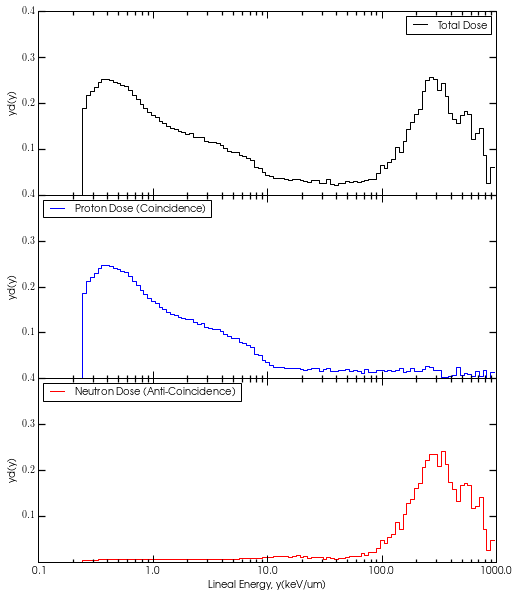

In [8]:
##########################################################################################
# Plot the y vs. ydy spectrum data
fig_ydy, (ax_ydy,ax_ydy_coinc,ax_ydy_acoinc) = plt.subplots(3, sharex=True,figsize=(fig_size[0],fig_size[1]*2))

# Combine y2low and y2up to create bins
y2_bins = np.concatenate((y2low,y2up))
y2_bins.sort(kind='mergesort')

ax_ydy.semilogx(y2_bins, np.repeat(ydy, 2), linewidth=1.0, label="Total Dose", color='black', lw=2)
ax_ydy_coinc.semilogx(y2_bins, np.repeat(ydy_COINC, 2), linewidth=1.0, label="Proton Dose (Coincidence)", color='blue', lw=2)
ax_ydy_acoinc.semilogx(y2_bins, np.repeat(ydy_ACOINC, 2), linewidth=1.0, label="Neutron Dose (Anti-Coincidence)", color='red', lw=2)

# Figure Properties
ax_ydy_acoinc.set_xlabel('Lineal Energy, y(keV/um)')
ax_ydy.set_ylabel('yd(y)')   
ax_ydy_coinc.set_ylabel('yd(y)')  
ax_ydy_acoinc.set_ylabel('yd(y)')  
ax_ydy.set_xlim(ymin, ymax)
ax_ydy_coinc.set_xlim(ymin, ymax)
ax_ydy_acoinc.set_xlim(ymin, ymax)
ax_ydy.set_ylim(0, 0.3)
ax_ydy.set_yticks([0.1,0.2,0.3,0.4])
ax_ydy_coinc.set_ylim(0, 0.3)
ax_ydy_coinc.set_yticks([0.1,0.2,0.3,0.4])
ax_ydy_acoinc.set_ylim(0, 0.3)
ax_ydy_acoinc.set_yticks([0.1,0.2,0.3,0.4])

from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
ax_ydy.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax_ydy.yaxis.set_major_formatter(ScalarFormatter())

ax_ydy.legend(loc='upper right')
ax_ydy_coinc.legend(loc='upper left')
ax_ydy_acoinc.legend(loc='upper left')

# Fine-tune figure 
# Make subplots close to each other
fig_ydy.tight_layout()
fig_ydy.subplots_adjust(hspace=0)

# Save the figure 
file_ydy = 'G4CNPTEPC_ydy_3panel.pdf'
plt.savefig('../Results/ACD_4p0mm/' + file_ydy, bbox_inches="tight")
print 'Plot saved to: ' + ('../Results/ACD_4p0mm/'+file_ydy)

# Show the figure
plt.show(fig_ydy)

Plot saved to: ../Results/ACD_4p0mm/G4CNPTEPC_ydy_1panel.pdf


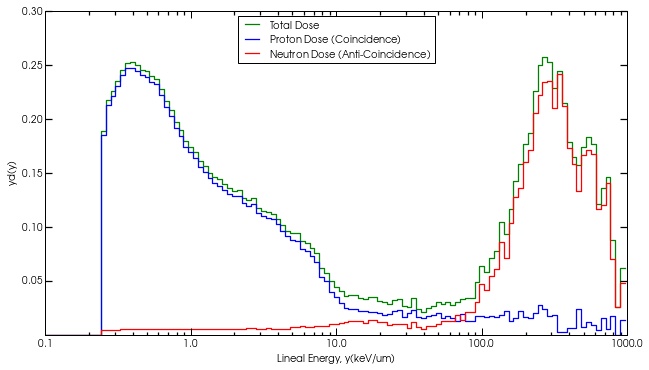

In [14]:
##########################################################################################
# Plot the y vs. ydy spectrum data
fig_ydy, (ax_ydy) = plt.subplots()

ax_ydy.semilogx(y2_bins, np.repeat(ydy, 2), lw=1.25, label="Total Dose", color='green', linestyle="-", drawstyle='steps')
ax_ydy.semilogx(y2_bins, np.repeat(ydy_COINC, 2), lw=1.25, label="Proton Dose (Coincidence)", color='blue', linestyle="-", drawstyle='steps')
ax_ydy.semilogx(y2_bins, np.repeat(ydy_ACOINC, 2), lw=1.25, label="Neutron Dose (Anti-Coincidence)", color='red', linestyle="-", drawstyle='steps')

# Figure Properties
ax_ydy.set_xlabel('Lineal Energy, y(keV/um)')
ax_ydy.set_ylabel('yd(y)')   
ax_ydy.set_xlim(ymin, ymax)
ax_ydy.set_ylim(0, 0.3)
ax_ydy.set_yticks([0.05,0.1,0.15,0.2,0.25,0.3])

from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
ax_ydy.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax_ydy.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

ax_ydy.legend(loc='upper center')

# Fine-tune figure 
fig_ydy.tight_layout()

# Save the figure 
file_ydy = 'G4CNPTEPC_ydy_1panel.pdf'
plt.savefig('../Results/ACD_4p0mm/' + file_ydy, bbox_inches="tight")
print 'Plot saved to: ' + ('../Results/ACD_4p0mm/'+file_ydy)

# Show the figure
plt.show(fig_ydy)

In [10]:
##########################################################################################
# Calculate the errors in each Ny bin
Ny_err, bins_Ny_err = np.histogram(np.sqrt(Ny)/Ny*100, bins=50, range=[0,5], normed=False, weights=None, density=None)

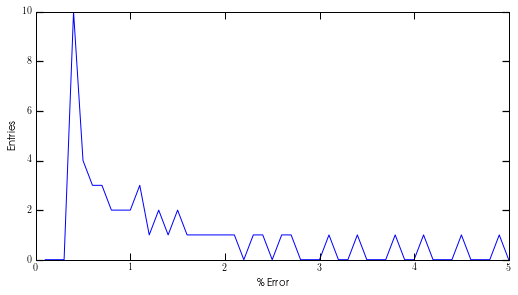

In [11]:
##########################################################################################
# Plot the errors
fig_Ny_err, ax_Ny_err = plt.subplots(1,1)

plt.plot(bins_Ny_err[1:], Ny_err, linewidth=1.0)

# Figure Properties
ax_Ny_err.set_xlabel('\% Error')
ax_Ny_err.set_ylabel('Entries')   
ax_Ny_err.set_xlim(0, 5)

# Tight Layout
plt.tight_layout()

# Save the figure 
# file_Ny_err = DataFilename.split('.')[0][:-1]+'_error.pdf'
# plt.savefig(DataFolder + file_Ny_err, bbox_inches="tight")
# print 'Plot saved to: ' + (DataFolder+file_Ny_err)

# Show the figure
plt.show(fig_Ny_err)